In [1]:
import pandas as pd  # data frame operations
#import sweetviz as sv  # EDA
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
#import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  #  PLOTTING
from scipy import stats
sns.set(style="darkgrid") # seaborn style
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [89]:
flight_base = pd.read_csv("https://raw.githubusercontent.com/itsAmeMario0o/BDA718-PROJECT/master/Data/finalprojectIST718v3.csv", sep=',', error_bad_lines=False)

In [90]:
flight1 = flight_base.copy()
np.shape(flight1)

(129889, 28)

In [91]:
flight1.head()

,Satisfaction,Airline_Status,Age,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airlines,Type_of_Travel,No._of_other_Loyalty_Cards,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Class,Day_of_Month,Flight_date,Airline_Code,Airline_Name,Orgin_City,Origin_State,Destination_City,Destination_State,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins
0,4.5,Blue,31,Male,1,2007,28,7,Business travel,2,0,75,Business,18,3/18/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no
1,4.0,Blue,56,Male,2,2006,41,3,Business travel,0,15,60,Business,11,1/11/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no
2,2.5,Blue,21,Female,2,2006,8,7,Personal Travel,0,0,135,Business,25,1/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes
3,4.0,Blue,43,Male,1,2007,9,9,Business travel,2,10,45,Eco,20,2/20/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes
4,5.0,Silver,49,Male,1,2006,14,10,Business travel,0,8,26,Eco,25,2/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no


# EDA

<function matplotlib.pyplot.show>

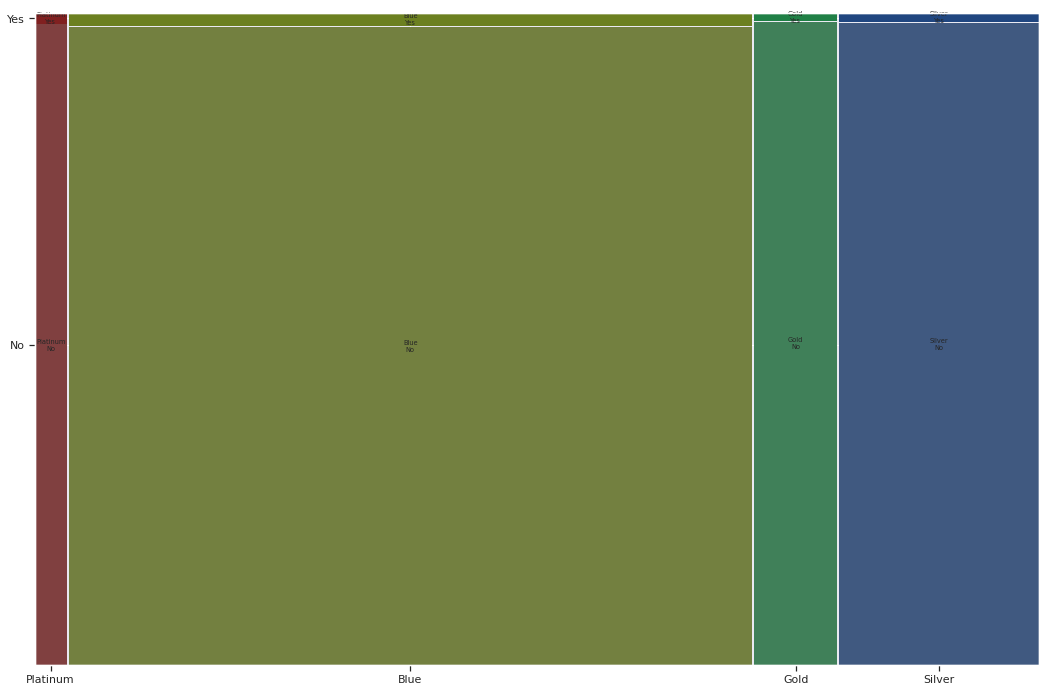

In [92]:
# Mosaic plot 
plt.rcParams['figure.figsize']=(18,12)
plt.rcParams['font.size'] = 8.0
mosaic(flight1.sort_values('Satisfaction'), ['Airline_Status','Flight_cancelled'], axes_label=True, gap=0.002)
plt.show

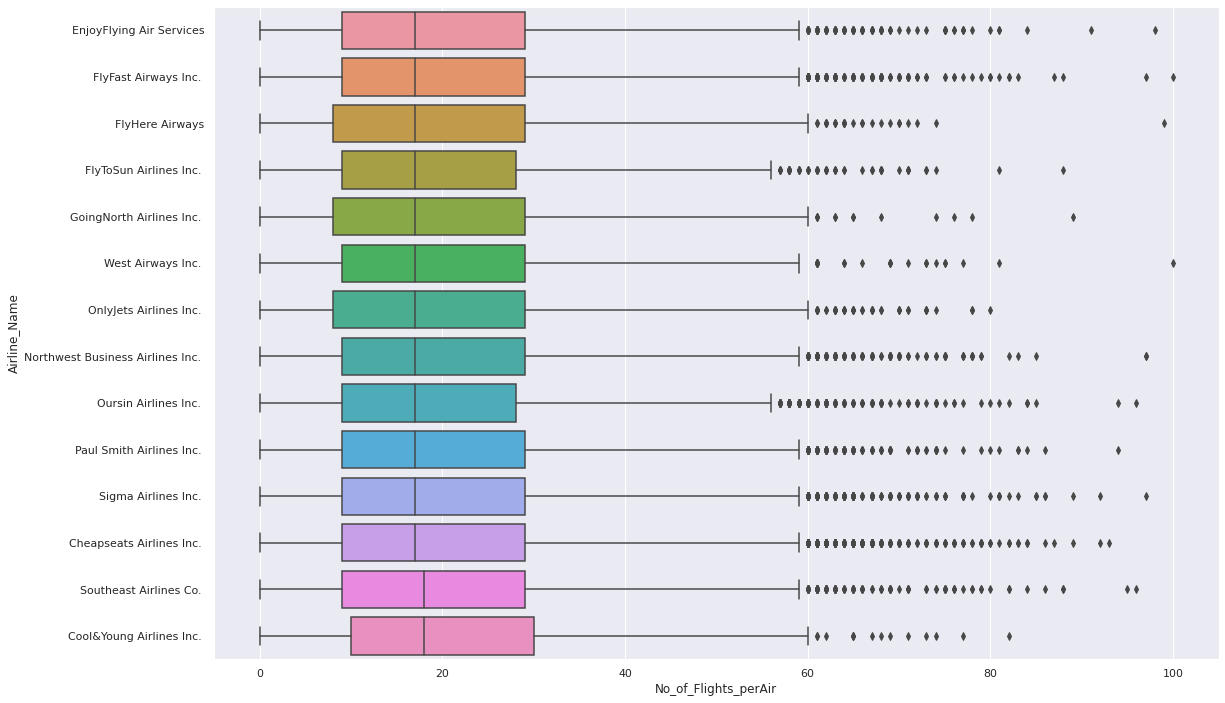

In [94]:
sns.boxplot(y=flight1["Airline_Name"], x=flight1["No_of_Flights_perAir"], data=flight1);
plt.show()

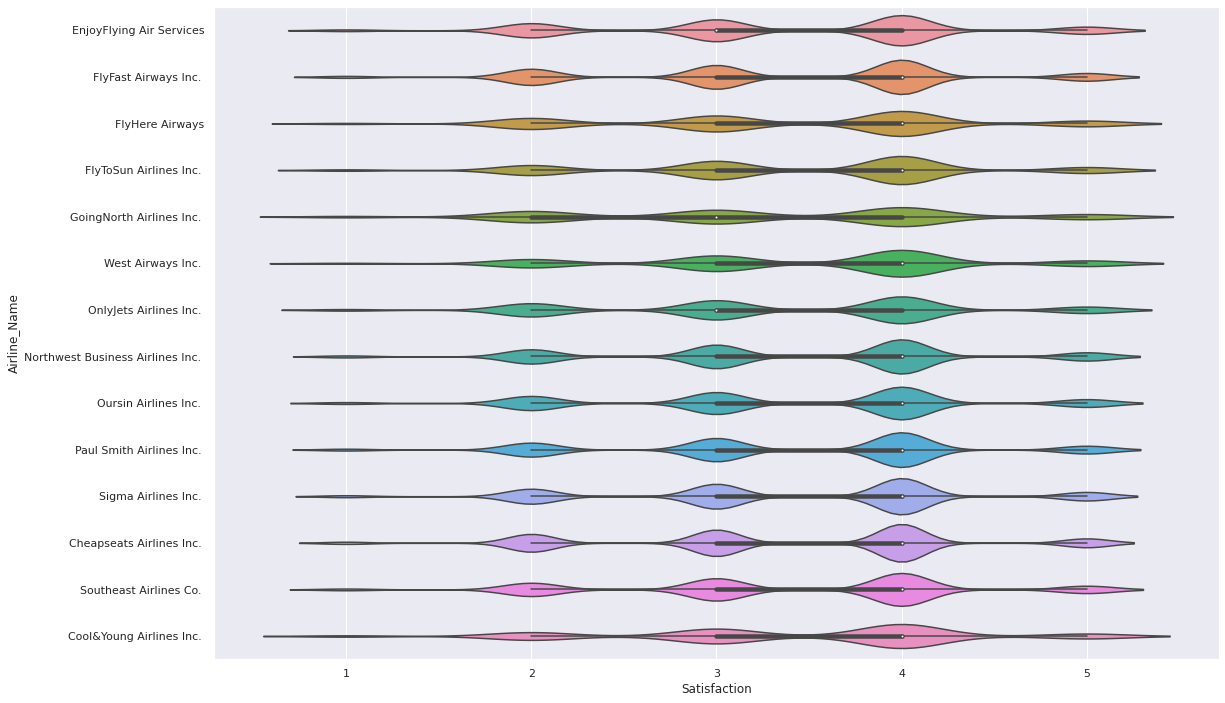

In [95]:
sns.violinplot(y=flight1["Airline_Name"], x=flight1["Satisfaction"], data=flight1);
plt.show()

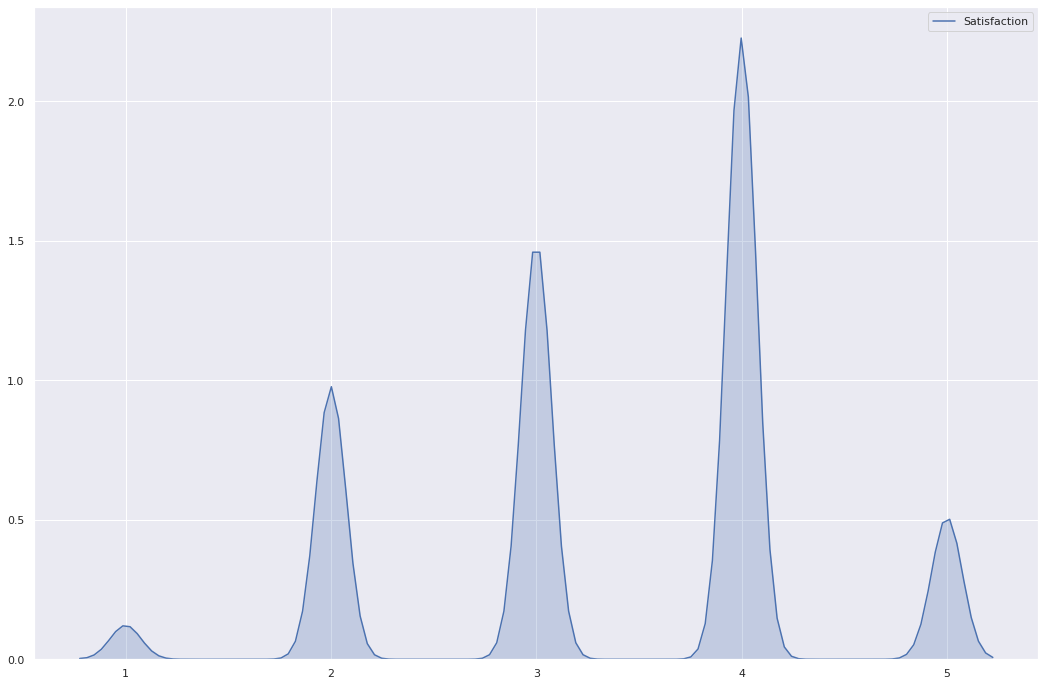

In [96]:
sns.kdeplot(flight1["Satisfaction"],shade=True)

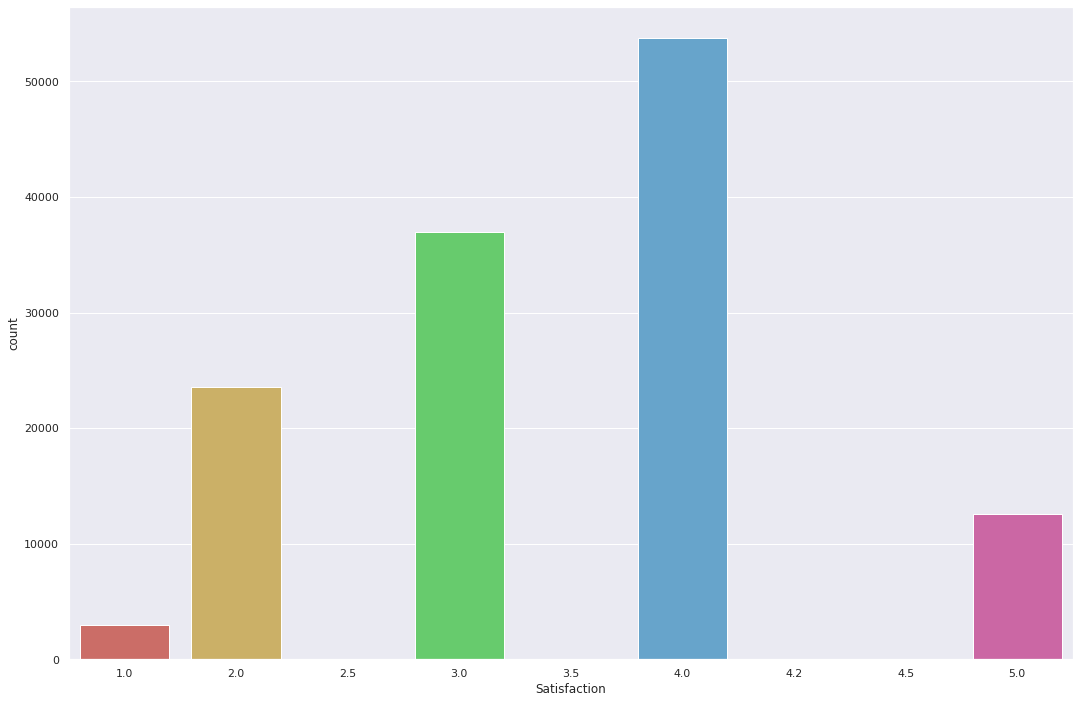

In [97]:
sns.countplot(x='Satisfaction',data = flight1, palette = 'hls')
plt.show()

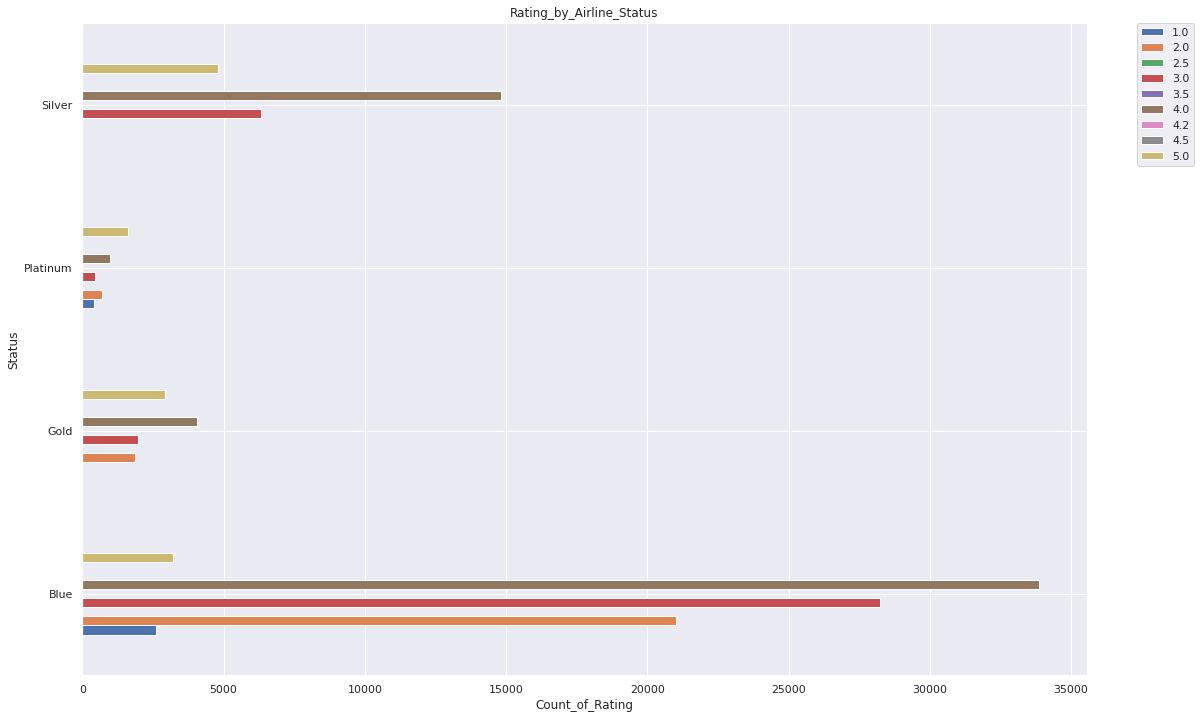

In [98]:
# https://stackoverflow.com/questions/41707992/how-to-refer-to-a-variable-name-with-spaces-in-python
# https://mode.com/example-gallery/python_horizontal_bar/
pd.crosstab(flight1['Airline_Status'], flight1.Satisfaction).plot(kind='barh')
plt.title('Rating_by_Airline_Status')
plt.xlabel('Count_of_Rating')
plt.ylabel('Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

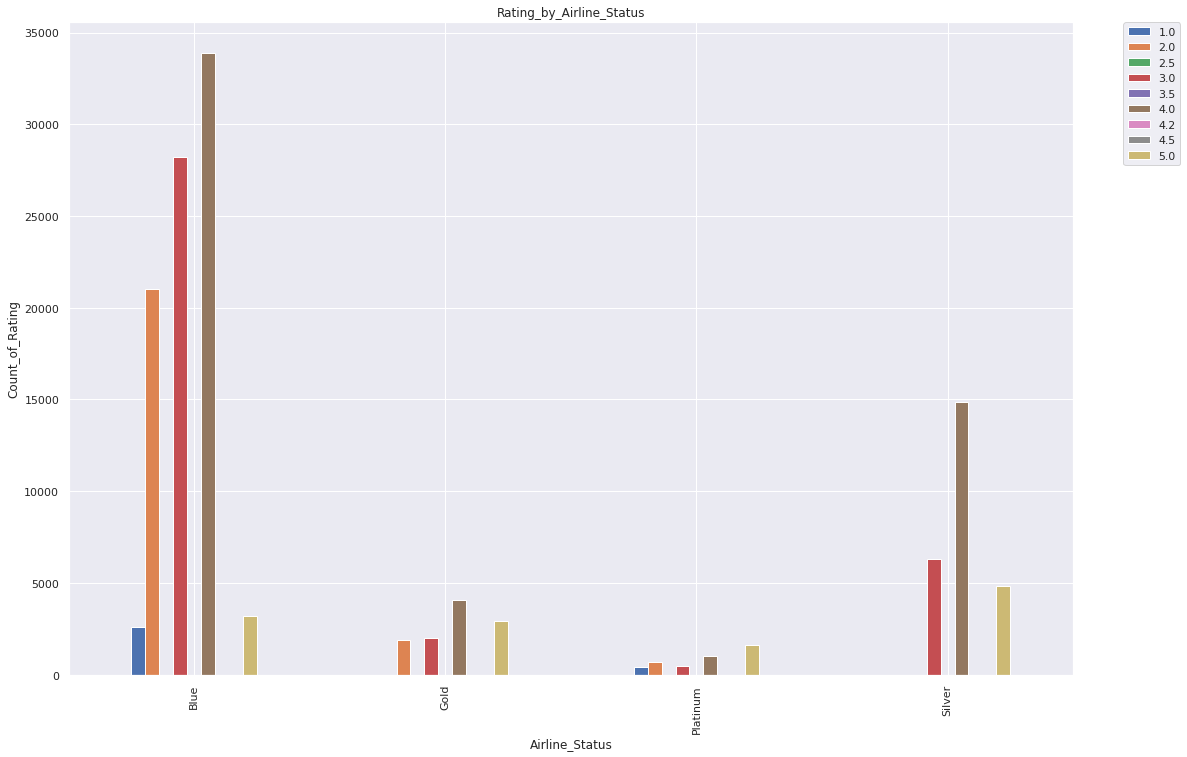

In [99]:
# https://stackoverflow.com/questions/41707992/how-to-refer-to-a-variable-name-with-spaces-in-python
# https://mode.com/example-gallery/python_horizontal_bar/
pd.crosstab(flight1['Airline_Status'], flight1.Satisfaction).plot(kind='bar')
plt.title('Rating_by_Airline_Status')
plt.xlabel('Airline_Status')
plt.ylabel('Count_of_Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

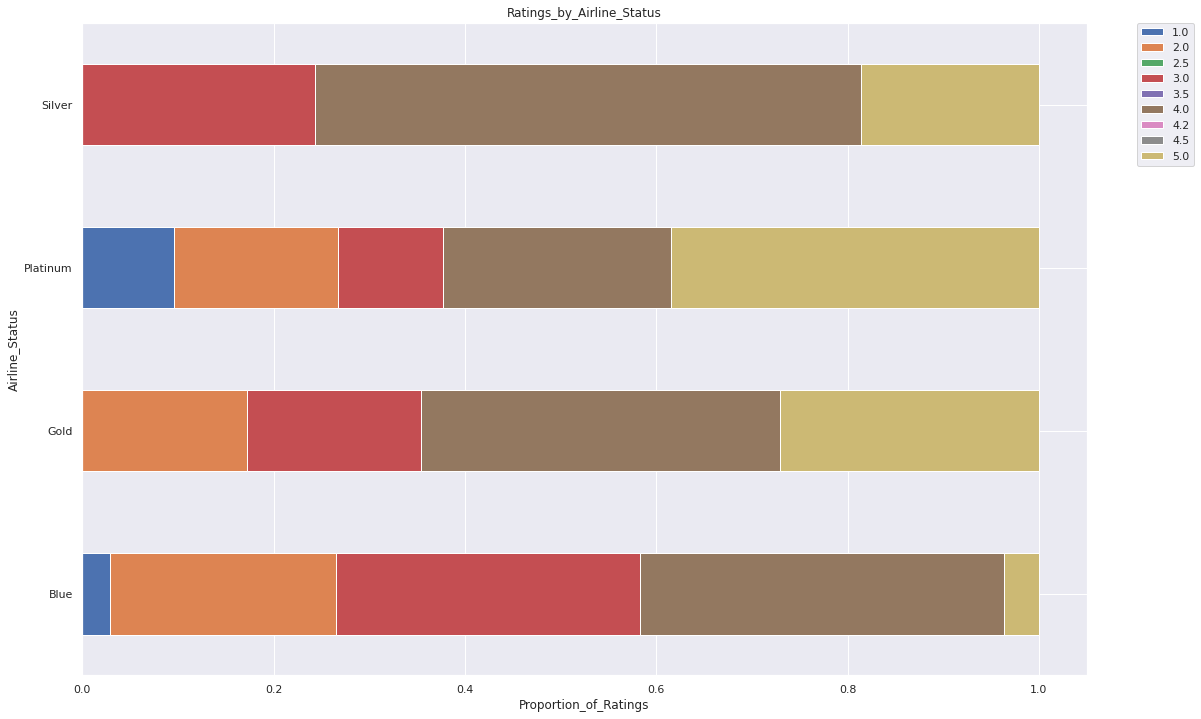

In [100]:
table=pd.crosstab(flight1['Airline_Status'],flight1.Satisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True)
plt.title('Ratings_by_Airline_Status')
plt.xlabel('Proportion_of_Ratings')
plt.ylabel('Airline_Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('')

# Linear Regression

In [101]:
flight1.head()

,Satisfaction,Airline_Status,Age,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airlines,Type_of_Travel,No._of_other_Loyalty_Cards,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Class,Day_of_Month,Flight_date,Airline_Code,Airline_Name,Orgin_City,Origin_State,Destination_City,Destination_State,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins
0,4.5,Blue,31,Male,1,2007,28,7,Business travel,2,0,75,Business,18,3/18/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no
1,4.0,Blue,56,Male,2,2006,41,3,Business travel,0,15,60,Business,11,1/11/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no
2,2.5,Blue,21,Female,2,2006,8,7,Personal Travel,0,0,135,Business,25,1/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes
3,4.0,Blue,43,Male,1,2007,9,9,Business travel,2,10,45,Eco,20,2/20/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes
4,5.0,Silver,49,Male,1,2006,14,10,Business travel,0,8,26,Eco,25,2/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no


In [102]:
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# building the train/test dataset
from sklearn.model_selection import train_test_split

flight1['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(flight1))
flight1_train = flight1[flight1['runiform'] >= 0.33]
flight1_test = flight1[flight1['runiform'] < 0.33]

In [103]:
print(np.shape(flight1_train))
print(np.shape(flight1_test))

(86912, 29)
(42977, 29)


In [83]:
#flight1.columns = flight1.columns.str.replace('p.a.', 'perAir')

In [82]:
#flight1.dtypes

In [104]:
flight1.head()

,Satisfaction,Airline_Status,Age,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airlines,Type_of_Travel,No._of_other_Loyalty_Cards,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Class,Day_of_Month,Flight_date,Airline_Code,Airline_Name,Orgin_City,Origin_State,Destination_City,Destination_State,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins,runiform
0,4.5,Blue,31,Male,1,2007,28,7,Business travel,2,0,75,Business,18,3/18/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no,0.855834
1,4.0,Blue,56,Male,2,2006,41,3,Business travel,0,15,60,Business,11,1/11/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no,0.061995
2,2.5,Blue,21,Female,2,2006,8,7,Personal Travel,0,0,135,Business,25,1/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes,0.703131
3,4.0,Blue,43,Male,1,2007,9,9,Business travel,2,10,45,Eco,20,2/20/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes,0.740217
4,5.0,Silver,49,Male,1,2006,14,10,Business travel,0,8,26,Eco,25,2/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no,0.595373


In [105]:
# specify a simple model
my_model_1 = str('Satisfaction ~ Price_Sensitivity + Age + Gender + Type_of_Travel + Airline_Status + Class + No_of_Flights_perAir + Destination_State + Origin_State + Flight_cancelled + Flight_time_in_minutes')

In [106]:
#import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

# fit the model to the training set
train_model_fit_1 = smf.ols(my_model_1, data = flight1_train).fit()
# summary of model fit to the training set
print(train_model_fit_1.summary())
# training set predictions from the model fit to the training set
flight1_train['predict_satisfaction'] = train_model_fit_1.fittedvalues

# test set predictions from the model fit to the training set
flight1_test['predict_satisfaction'] = train_model_fit_1.predict(flight1_test)
print(flight1_test)
print(flight1_train)

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     542.2
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:00:53   Log-Likelihood:                -94584.
No. Observations:               85099   AIC:                         1.894e+05
Df Residuals:                   84984   BIC:                         1.905e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


        Satisfaction Airline_Status  ...  runiform predict_satisfaction
1                4.0           Blue  ...  0.061995             3.566791
8                4.0           Blue  ...  0.184292             3.527057
9                4.0           Blue  ...  0.201412             3.498313
13               3.0         Silver  ...  0.112639             4.132785
15               3.0           Blue  ...  0.017938             3.338196
...              ...            ...  ...       ...                  ...
129874           3.0           Gold  ...  0.060423             3.906719
129876           3.0           Blue  ...  0.013643             3.506704
129878           1.0       Platinum  ...  0.015198             3.801644
129880           4.0         Silver  ...  0.127510             4.028617
129886           2.0           Blue  ...  0.128857             2.372021

[42977 rows x 30 columns]
        Satisfaction Airline_Status  ...  runiform predict_satisfaction
0                4.5           Blue  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
